In [249]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [250]:
ds_path = os.getcwd().removesuffix('notebook\\eda')+'datasets\\'
artifacts_path = os.getcwd().removesuffix('notebook\\eda')+'artifacts\\'
os.makedirs(artifacts_path, exist_ok=True)
fetp_path = ds_path + 'fetp.csv'
fr_path = ds_path + 'fr.csv'
gdp_path = ds_path + 'gdp.csv'

In [251]:
fetp, fr, gdp = pd.read_csv(fetp_path), pd.read_csv(fr_path), pd.read_csv(gdp_path)

In [252]:
fetp.rename(columns={'Employment to population ratio, 15+, female (%) (national estimate)':'emp_pop_ratio'},inplace=True)
fr.rename(columns={'Fertility rate - Sex: all - Age: all - Variant: estimates':'fr_ratio'},inplace=True)
gdp.rename(columns={'GDP, PPP (constant 2017 international $)':'gdp_ppp'},inplace=True)

### Year Range

In [253]:
year_min, year_max = max(fetp['Year'].min(),fr['Year'].min(),gdp['Year'].min()), min(fetp['Year'].max(),fr['Year'].max(),gdp['Year'].max())

In [254]:
year_min, year_max

(np.int64(1990), np.int64(2022))

In [255]:
countries = ['United States', 'India', 'Germany']
all_years = { i for i in range(year_min, year_max+1)}

### FETP Missing Years

In [256]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(fetp[fetp['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : {1990, 1991, 1992, 1993, 1995, 1996, 1997, 1998, 1999, 2001, 2002, 2003, 2004, 2006, 2007, 2008, 2009, 2011, 2013, 2014, 2015, 2016, 2017}
Germany : set()


### FR Missing Years

In [257]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(fr[fr['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


### GDP Missing Years

In [258]:
print('Missing Years')
for i in countries:
    print(f'{i} : {all_years - set(gdp[gdp['Entity']==i]['Year'].to_list())}')

Missing Years
United States : set()
India : set()
Germany : set()


### Filtering DFs wrt countries

In [259]:
filtered_fetp = fetp[fetp['Entity'].isin(countries) & fetp['Year'].isin(all_years)]
filtered_fr = fr[fr['Entity'].isin(countries) & fr['Year'].isin(all_years)]
filtered_gdp = gdp[gdp['Entity'].isin(countries) & gdp['Year'].isin(all_years)]

In [260]:
filtered_gdp['gdp_ppp']=filtered_gdp['gdp_ppp']/1_000_000_000

C:\Users\sathy\AppData\Local\Temp\ipykernel_27856\2970267281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_gdp['gdp_ppp']=filtered_gdp['gdp_ppp']/1_000_000_000


In [272]:
filtered_fetp.describe()

,Year,emp_pop_ratio
count,76.000000,76.000000
mean,2006.802632,48.119000
std,9.769367,9.918744
min,1990.000000,19.145000
25%,1998.750000,44.448500
50%,2007.000000,53.144500
75%,2015.250000,54.617500
max,2022.000000,57.485000


In [273]:
filtered_fetp[filtered_fetp['emp_pop_ratio']==19.145000]

,Entity,Code,Year,emp_pop_ratio
1557,India,IND,2018,19.145


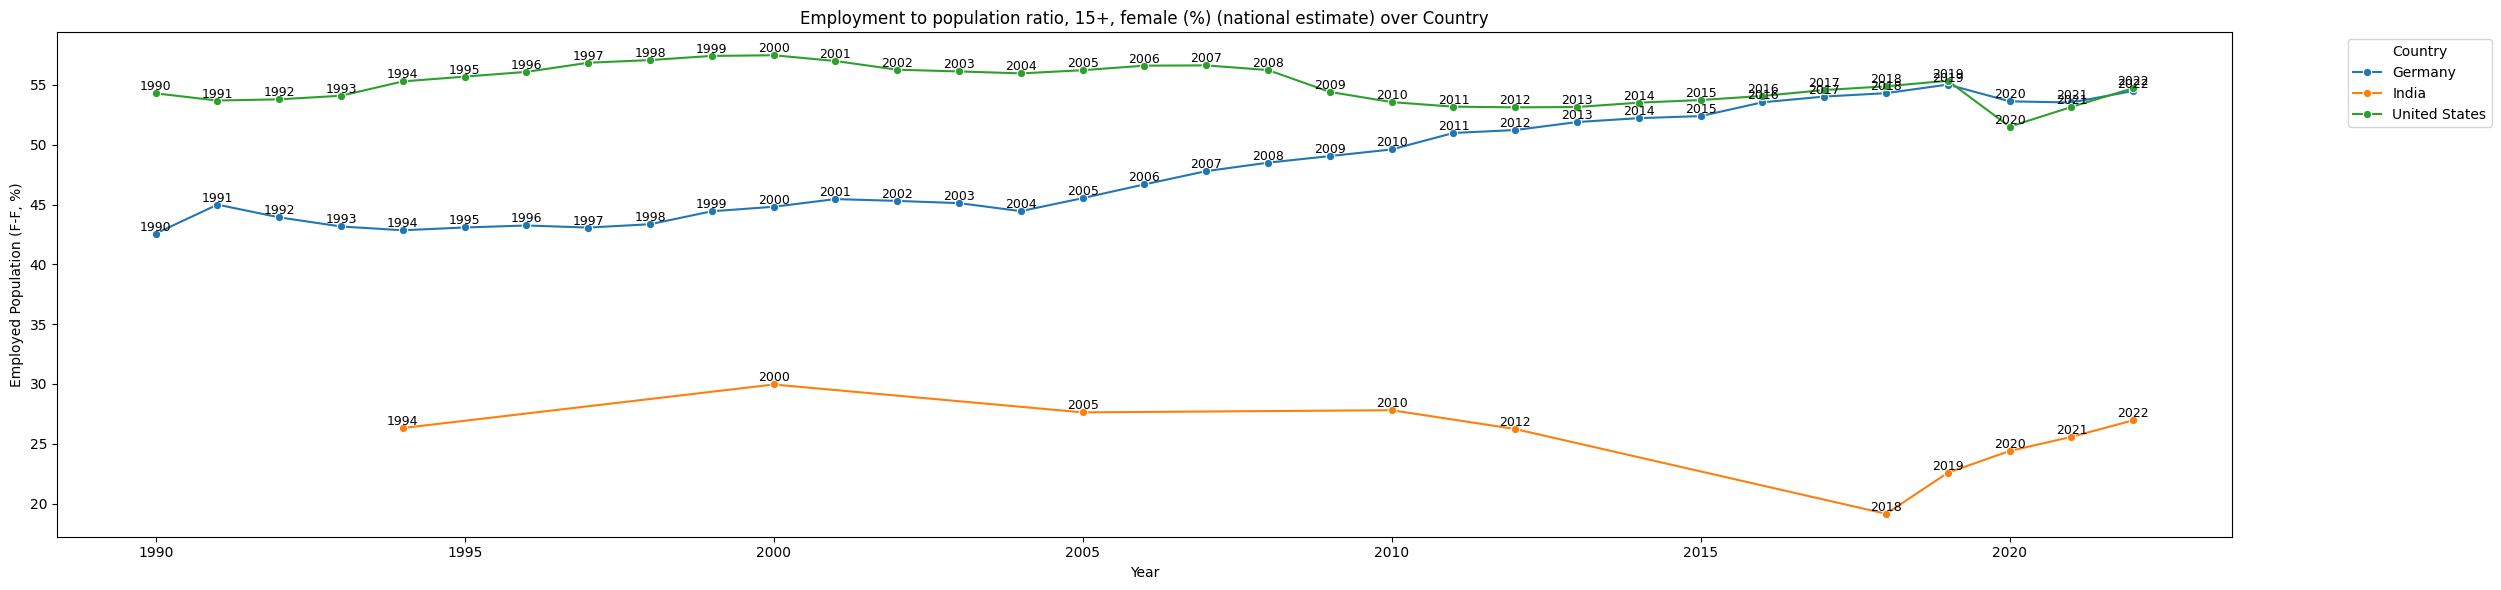

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set palette
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(25, 6))  # Adjust the size of the plot if needed
sns.lineplot(data=filtered_fetp, x='Year', y='emp_pop_ratio', hue='Entity', marker='o')

# Title and labels
plt.title('Employment to population ratio, 15+, female (%) (national estimate) over Country')
plt.xlabel('Year')
plt.ylabel('Employed Population (F-F, %)')

# Add labels over the points
for line in plt.gca().get_lines():  # Loop over each line in the plot
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for i in range(len(x_data)):
        plt.text(x_data[i], y_data[i], str(int(x_data[i])), ha='center', va='bottom', fontsize=9, color='black')

# Show the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


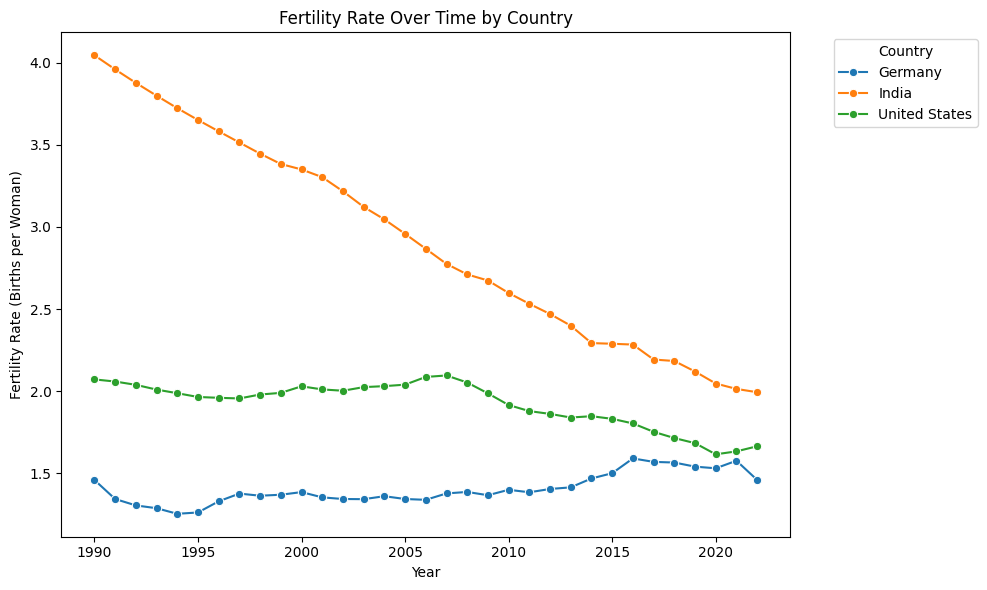

In [262]:
# Set the color palette for countries
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if needed
sns.lineplot(data=filtered_fr, x='Year', y='fr_ratio', hue='Entity', marker='o')

# Title and labels
plt.title('Fertility Rate Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Fertility Rate (Births per Woman)')

# Show the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

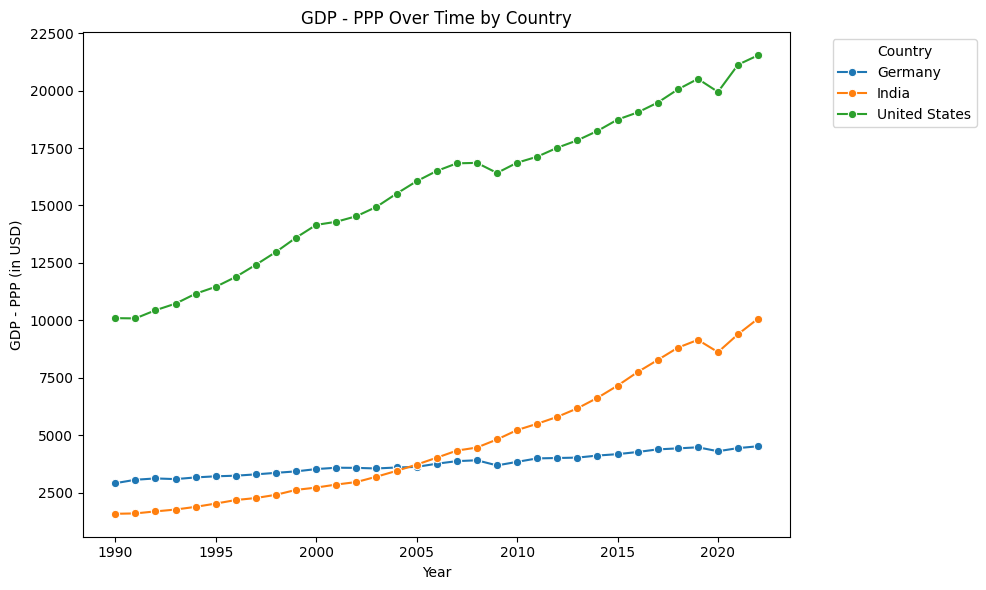

In [263]:
# Set the color palette for countries
sns.set_palette("tab10")  # You can change the palette as needed

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust the size of the plot if needed
sns.lineplot(data=filtered_gdp, x='Year', y='gdp_ppp', hue='Entity', marker='o')

# Title and labels
plt.title('GDP - PPP Over Time by Country')
plt.xlabel('Year')
plt.ylabel('GDP - PPP (in USD)')

# Show the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [264]:
tmp_df1 = pd.merge(filtered_fetp, filtered_fr, how='outer', on=['Entity','Year'])
tmp_df2 = pd.merge(tmp_df1, filtered_gdp, how='outer', on=['Entity', 'Year'])

In [265]:
merged_df = tmp_df2.filter(items=['Entity','Year','emp_pop_ratio','fr_ratio','gdp_ppp'])

In [266]:
merged_df.to_csv(artifacts_path+'eco-1990-2022.csv',index=False)

In [267]:
filtered_gdp[filtered_gdp['Entity']=='Singapore']

,Entity,Code,Year,gdp_ppp
